#  Absenteeism Prediction

In [2]:
import pandas as pd
import numpy as np
data_preprocessed=pd.read_csv('Absenteeism_preprocessed.csv')
data_preprocessed.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Month value,Day of the week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,4
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0,2
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0,4
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1,2


We have to see which input variables(features) are the most important elements for the prediction step.<br> we divide people into 2 different classes: Moderately absenteeism and excessively absenteeism 

In [3]:
data_preprocessed['Absenteeism Time in Hours'].median()

3.0

In [7]:
targets=np.where(data_preprocessed['Absenteeism Time in Hours']>data_preprocessed['Absenteeism Time in Hours'].median(),1,0)
#we can use map method as well
data_preprocessed['Excessive Absenteeism']=targets
data_preprocessed.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Month value,Day of the week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Excessive Absenteeism
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,4,1
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0,2,0
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0,4,1
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1,2,0


we will use in pandas iloc method for feature selection dataFrame.iloc[row indices,column indices]

We drop "Absenteeism Time in Hours" because we customized our target into 0,1 by Excessive Absenteeism

In [8]:
data_with_targets=data_preprocessed.drop(['Absenteeism Time in Hours'],axis=1)

In [9]:
data_with_targets.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Month value,Day of the week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Excessive Absenteeism
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,1
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0,0
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0,1
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1,0


# Selecting the inputs variables(features) for regression or Generalling ML algorithms

In [10]:
data_with_targets.shape

(700, 15)

In [13]:
data_with_targets.iloc[:,1:14] #our desired feauters
data_with_targets.iloc[:,:-1] #Now we need scailing input data
unscaled_inputs=data_with_targets.iloc[:,:-1]

# Standardize the input data

Standardize features by removing the mean and scaling to unit variance<br>
The standard score of a sample x is calculated as:<br>
z = (x - u) / s

In [15]:
from sklearn.preprocessing import StandardScaler
absenteeism_scaler=StandardScaler()
absenteeism_scaler.fit(unscaled_inputs)
scaled_inputs=absenteeism_scaler.transform(unscaled_inputs)
scaled_inputs.shape

(700, 14)

In [16]:
scaled_inputs

array([[-0.57735027, -0.09298136, -0.31448545, ..., -0.43875307,
         0.88046927,  0.26848661],
       [-0.57735027, -0.09298136, -0.31448545, ..., -0.43875307,
        -0.01928035, -0.58968976],
       [-0.57735027, -0.09298136, -0.31448545, ..., -0.43875307,
        -0.91902997, -0.58968976],
       ...,
       [ 1.73205081, -0.09298136, -0.31448545, ...,  2.27918632,
        -0.91902997, -0.58968976],
       [-0.57735027, -0.09298136, -0.31448545, ...,  2.27918632,
        -0.91902997, -0.58968976],
       [-0.57735027, -0.09298136, -0.31448545, ..., -0.43875307,
        -0.01928035,  0.26848661]])

# Splitting dataset into train & test and shuffle

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(scaled_inputs,targets,train_size=0.8,random_state=20)#shuffle=True
print(x_train.shape,y_train.shape)

(560, 14) (560,)


In [19]:
print(x_test.shape,y_test.shape)

(140, 14) (140,)


# ***Don't forget Machine Learning is 90% data preprocessing and 10% prediction modeling ***

# Prediction using Logistic regression 

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
reg=LogisticRegression()
reg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [21]:
reg.score(x_train,y_train)

0.7821428571428571

In [59]:
reg.score(x_test,y_test)

0.7357142857142858

In [60]:
regpred=reg.predict(x_test)

# Prediction using K-Nearest Neighbors (KNN) Method

In [61]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
# Fit the classifier to the data
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [62]:
#check accuracy of our model on the training data
knn.score(x_train, y_train)

0.85

In [63]:
#check accuracy of our model on the test data
knn.score(x_test, y_test)

0.6857142857142857

In [64]:
knnpred=knn.predict(x_test)

# Prediction Using Random Forest Regressor

In [90]:
from sklearn.ensemble import RandomForestRegressor
ranfor = RandomForestRegressor(n_estimators=10)
ranfor.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [91]:
ranfor.score(x_train, y_train)

0.8354621170737868

In [92]:
ranfor.score(x_test,y_test)

0.29085280247780243

In [93]:
ranforpred=ranfor.predict(x_test)

WE CAN OPTIMIZE THE PREDICTION RESULTS >0.5 AS LABEL 1,OTHERES AS 0

In [95]:
ranforpred=np.where(ranfor.predict(x_test)>0.5,1,0)
#we can use map method as well

In [96]:
from sklearn.metrics import mean_absolute_error, r2_score
print("Mean Absolute Error (MAE) : {}".format(mean_absolute_error(y_test, model.predict(x_test))))
print("R2: {}".format(r2_score(y_test, model.predict(x_test))))

Mean Absolute Error (MAE) : 0.2990238095238095
R2: 0.32007527413777404


R2 return the coefficient of determination  of the prediction.<br>
The R'2 coefficient  is defined as:<br>
1-u/v, where u is the residual sum of squares ((y_true - y_pred) ** 2).sum() and v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum(). The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a  score of 0.0.

# Visualization: Comparison between different models

We just visualize the outcome of prediction for 50 samples of test dataset

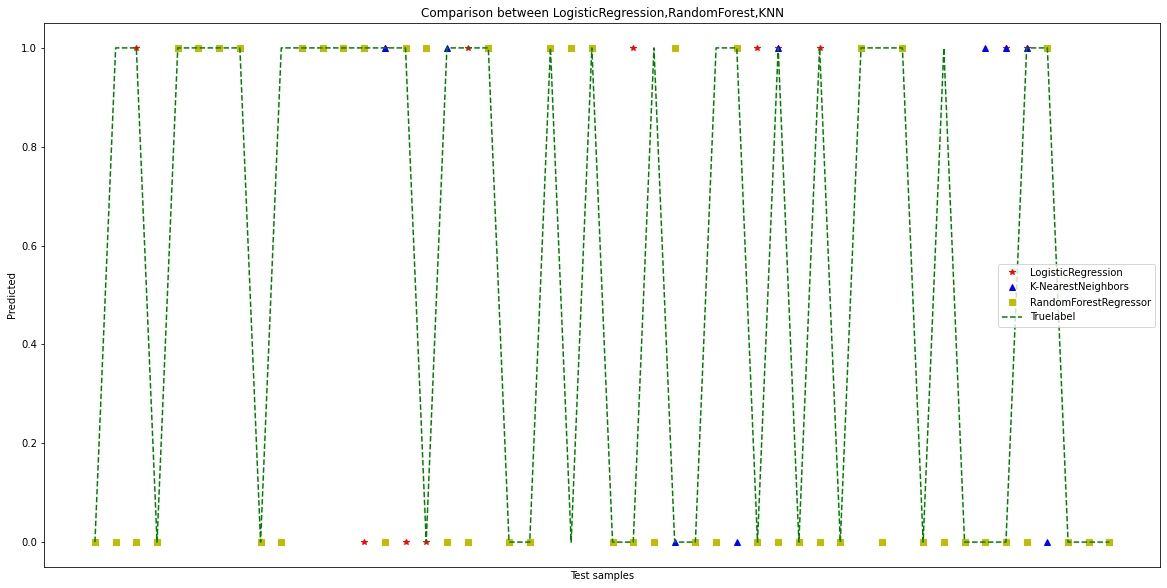

In [97]:
from matplotlib import pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(regpred[:50], 'r*', label='LogisticRegression')
plt.plot(knnpred[:50], 'b^', label='K-NearestNeighbors')
plt.plot(ranforpred[:50], 'ys', label='RandomForestRegressor')
plt.plot(y_test[:50], 'g--', label='Truelabel')
#plt.plot(pred4, 'gd', ms=10, label='VotingRegressor')

plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('Predicted')
plt.xlabel('Test samples')
plt.legend(loc="best")
plt.title('Comparison between LogisticRegression,RandomForest,KNN')

plt.show()

# Manually check the accuracy

Let us go back again to our Logistic Regression model,for the accuracy simply we have to compare the model output with respect to real data target remember we are checking only training data now, we will see the results for test data as well

In [24]:
model_outputs=reg.predict(x_train)

In [98]:
model_outputs==y_train

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True, False, False,  True,  True,  True,  True,
       False,  True, False,  True, False, False,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True, False,  True, False,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
       False,  True, False,  True,  True, False, False, False,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,

In [99]:
np.sum(model_outputs==y_train)

438

In [100]:
np.sum(model_outputs==y_train)/model_outputs.shape[0]

0.7821428571428571

# Creating Summary Table for Logistic Regression

Finding the intercept-bias term- and coefficients in regressen equation Y=AX+b, A stands for coefficients matrix, X stands for features or input variables, b is bias term or intercept

In [109]:
reg.intercept_

array([-0.20408091])

In [110]:
reg.coef_

array([[ 1.92966674e+00,  3.07300162e-01,  1.41519068e+00,
         1.15135359e+00,  1.81700330e-01, -7.37717897e-02,
         7.00065373e-01, -3.80569891e-02, -2.03032254e-01,
        -1.66376294e-03,  3.15446569e-01, -1.52932469e-01,
         3.73427600e-01, -3.23489471e-01]])

In [111]:
unscaled_inputs.columns

Index(['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4', 'Month value',
       'Day of the week', 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education', 'Children',
       'Pets'],
      dtype='object')

In [112]:
feature_name=unscaled_inputs.columns
summary_table=pd.DataFrame(columns=['feature_name'],data=feature_name)
summary_table['coefficients']=np.transpose(reg.coef_)
summary_table

,feature_name,coefficients
0,Reason_1,1.929667
1,Reason_2,0.307300
2,Reason_3,1.415191
3,Reason_4,1.151354
4,Month value,0.181700
5,Day of the week,-0.073772
6,Transportation Expense,0.700065
7,Distance to Work,-0.038057
8,Age,-0.203032
9,Daily Work Load Average,-0.001664


The only thing has been missed is bias term or intercept, How to add intercept to summary table??

In [113]:
summary_table.index=summary_table.index+1
summary_table.loc[0]=['Intercept',reg.intercept_[0]]
summary_table=summary_table.sort_index()
summary_table

,feature_name,coefficients
0,Intercept,-0.204081
1,Reason_1,1.929667
2,Reason_2,0.307300
3,Reason_3,1.415191
4,Reason_4,1.151354
5,Month value,0.181700
6,Day of the week,-0.073772
7,Transportation Expense,0.700065
8,Distance to Work,-0.038057
9,Age,-0.203032


# Interpreting the coefficients and understanding which features has most effect on our prediction

In [114]:
summary_table['Odds_ratio']=np.exp(summary_table.coefficients)
summary_table.sort_values('Odds_ratio',ascending=False)
summary_table

,feature_name,coefficients,Odds_ratio
0,Intercept,-0.204081,0.815396
1,Reason_1,1.929667,6.887215
2,Reason_2,0.307300,1.359749
3,Reason_3,1.415191,4.117271
4,Reason_4,1.151354,3.162471
5,Month value,0.181700,1.199255
6,Day of the week,-0.073772,0.928884
7,Transportation Expense,0.700065,2.013884
8,Distance to Work,-0.038057,0.962658
9,Age,-0.203032,0.816252


# Those features are not significant and very important if :<br>1-   the corresponding coefficient is near to zero (this feauture has no effect)<br> 2- Odds_Ratio near to one (it means we do not have a change)



In [115]:
reg.score(x_test,y_test) 

0.7357142857142858

the test accuracy is always 10% to 20%less than the train accuracy. If the accuracy is less by definition this means that our MODEL is overfitted and doesnt work good for unseen data

Let us now calculate the probability of prediction

In [116]:
predicted_proba=reg.predict_proba(x_test)

In [119]:
np.shape(predicted_proba)

(140, 2)

The first column is about the probability of our model prediction result to be zero and the second column for the corresponding probability for 1

# Save the Model ( our prediction object for logistic regression : reg )

In [120]:
import pickle
with open('model','wb') as file:#the name of the file will be model, the writing method would be write bite
    pickle.dump(reg,file) #dump means saving a reg in file

We just saved the model but for any new data if we want to use the saved model we have to do scaling process again
How we simplify the process for the next prediction with unseen data: we can create a Module and reuse this module
